### 1. 유방암 데이터를 활용하여 Ensemble 모델을 학습해보자
- wisconsin의 유방암 데이터 셋
- 총 569건의 데이터(악성-212, 양성-357) 

In [1]:
# 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data

# 데이터 형태 : 전체적인 형태 - 딕셔너리 구조, bunch 객체

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
# 딕셔너리 구조에서 데이터 확인 : 키 값들을 확인
# keys()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# 분류에 사용할 특성 확인 --> 학습에 사용할 데이터의 이름, 개수 확인 
print(cancer_data.feature_names)
print(len(cancer_data.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [5]:
# 각 특성들의 자료형 확인
print('유방암 데이터의 자료형 : ', type(cancer_data.data))

유방암 데이터의 자료형 :  <class 'numpy.ndarray'>


In [6]:
# 유방암 데이터 셋의 크기 확인
cancer_data.data.shape

(569, 30)

In [7]:
# 양성(357)과 악성(212) 데이터 수 확인 
# 정답 레이블(클래스)의 이름 --> cancer_data.target_names 
# 클래스별(범주별) 개수를 반환 ==> bincount()  - numpy에 있는 함수
# 동일한 개수로 이루어진 2개 이상의 데이터를 연결하는 함수 ==> zip()
# zip() ==> 약성 : 00명, 양성 : 00명

import numpy as np
for i, j in zip(cancer_data.target_names, np.bincount(cancer_data.target)) :
    print({i : j})

{'malignant': 212}
{'benign': 357}


### 2. 훈련데이터와 테스트데이터로 분리

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 7 : 3 
# random_state = 10
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,
                                                    cancer_data.target, 
                                                    test_size=0.3, 
                                                    random_state=10)

In [10]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

### 3. RandomForest 모델 적용하기
- n_estimators : 몇 개의 트리를 만들지 선택 ==> (100개) 
- random_state = 10
- max_features : 사용할 특징( 컬럼 들을 정하는 비율 최대값은 1 권고 : 0.3~ 0.7)
     * 0: 특성을 사용하지 않겠다.
     * 1: 전체 특성을 활용하겠다.
         - max fearures의 값을 늘리는 경우 : 개별 트리가 적을 때.
         - max features의 값을 줄이는 경우 : 개별 트리가 많을 때.

In [11]:
# 필요한 라이브러러 꺼내오기
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 하이퍼 파라미터 튜닝 
forest_model = RandomForestClassifier(n_estimators=100, random_state=10)

# 학습
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [12]:
# 교차검증으로 평가 : cv = 5
from sklearn.model_selection import cross_val_score
cross_val_score(forest_model, X_train, y_train, cv=5).mean()

0.959746835443038

In [13]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = forest_model.predict(X_train)
test_pred = forest_model.predict(X_test)

In [14]:
# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

In [15]:
# 학습 및 테스트 데이터에 대한 분류모델의 성능(평균 정확도) 확인
from sklearn.metrics import accuracy_score

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.982


### gridSearchCV를 적용하여 모델의 성능 향상시키기

In [16]:
# gridSearchCV 가져오기
from sklearn.model_selection import GridSearchCV
# 튜닝할 하이퍼파라미터 설정
params = {"n_estimators": [10, 20, 30, 120, 400, 777],
         'max_depth': [4, 7,13, 77],
        'max_leaf_nodes':[2,5,7],
        'min_samples_split':[10, 50, 77]
         }
# n_jobs = -1  내 컴퓨터의 cpu 성능을 모두 쓰겠다.
forest_model1 = RandomForestClassifier(random_state= 10, n_jobs=  -1)

#gridSearchCV생성
# scoring 점수 확인
grid = GridSearchCV(forest_model1, params, cv = 5, scoring = 'accuracy', n_jobs= -1)
# 4. grid 모델 학습
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [4, 7, 13, 77],
                         'max_leaf_nodes': [2, 5, 7],
                         'min_samples_split': [10, 50, 77],
                         'n_estimators': [10, 20, 30, 120, 400, 777]},
             scoring='accuracy')

In [17]:
#최적의 하이퍼 파라미터 조합
print(f'최적의 파라미터: {grid.best_params_}')
print(f'최고 점수: {grid.best_score_}')


최적의 파라미터: {'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 10, 'n_estimators': 400}
최고 점수: 0.9547468354430378


### 모델 완성 및  영향력 높은 특성 확인

In [18]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#randomForest 모델 완성하기
best_model = RandomForestClassifier(max_depth= 4, max_leaf_nodes= 5, min_samples_split = 10, n_estimators = 400, random_state= 10)

#best_model 학습
best_model.fit(X_train, y_train)

#영향력이 높은 특성 추출 feature_importances_
features = best_model.feature_importances_
print('특성들:\n', features)

특성들:
 [0.0536728  0.01313683 0.04964318 0.07050192 0.00293703 0.00805196
 0.0414762  0.103208   0.00067721 0.0013977  0.01114995 0.00154175
 0.01496878 0.01631096 0.00068954 0.00208061 0.00394887 0.0031154
 0.00092204 0.00071985 0.10799458 0.0079473  0.11870327 0.13592686
 0.00971182 0.01407149 0.03150416 0.16000723 0.00732575 0.00665695]


In [19]:
df =pd.DataFrame(features, index= cancer_data.feature_names,  columns= ['importances'])
sortedDf =df.sort_values(by= 'importances', ascending= False)
df

importances
mean radius                 0.053673
mean texture                0.013137
mean perimeter              0.049643
mean area                   0.070502
mean smoothness             0.002937
mean compactness            0.008052
mean concavity              0.041476
mean concave points         0.103208
mean symmetry               0.000677
mean fractal dimension      0.001398
radius error                0.011150
texture error               0.001542
perimeter error             0.014969
area error                  0.016311
smoothness error            0.000690
compactness error           0.002081
concavity error             0.003949
concave points error        0.003115
symmetry error              0.000922
fractal dimension error     0.000720
worst radius                0.107995
worst texture               0.007947
worst perimeter             0.118703
worst area                  0.135927
worst smoothness            0.009712
worst compactness           0.014071
worst concavity             0.031504
worst concave points        0.160007
worst symmetry              0.007326
worst fractal dimension     0.006657

### 시각화 하기

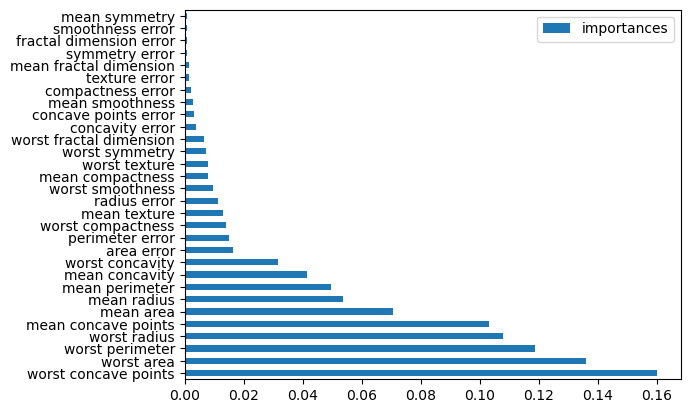

In [20]:
sortedDf.plot.barh()
plt.show()

In [21]:
#feature_importances를 이용해 영향력 높은 특성만 확인
# 특성의 중요도를 시각화 하는 함수를 정의
def plot_features_importances(columns, features, num): #컬럼, 특성 ,번호
    # 축 번호별로 중요도 그래프를 그리겠다.
    plt.barh(range(num), features) # x축 ,y축
    # 축번호의 축 이름을 붙이겠다.
    plt.yticks(np.arange(num), columns)
    plt.xlabel('features importance')
    plt.ylabel('feature')
    plt.ylim(-1, num)
    plt.show()

In [22]:
sortedDf.iloc[:8].shape[0]

8

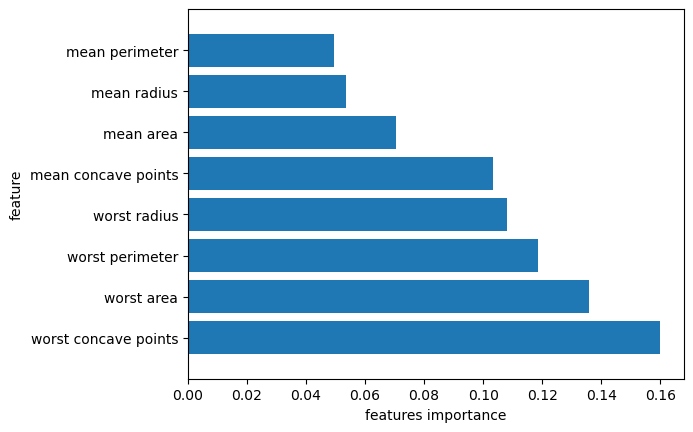

In [23]:
plot_features_importances(sortedDf.index[:8], sortedDf.iloc[:8,0],sortedDf.iloc[:8].shape[0])

###  AdaBoost 모델 적용하기
- 결정트리 기반의 모델이지만, 각각의 트리들이 독립적으로 존재하지 않음.
- 사전 가지치기 파라미터들을 사용할 수 없음.
- 이전 모델이 잘못 분류한 샘플에 대해서는 가중치를 높여서 다음 모델을 훈련시키는 강화학습과 비슷하다.
- n_estimators: 사용할 결정 트리의 개수
- learning_rate(학습률): 가중치 갱신의 변동촉을 조정, 0~1사이의 값, 기본값 1
    - 값이 크면 -> 과대 적합
    - 값이 작으면 -> 과소 적합

In [24]:
#Ada부스트 불러오기
from sklearn.ensemble import AdaBoostClassifier
# 모델 생성 및 하이퍼파라미터 설정
ada_model = AdaBoostClassifier(n_estimators= 50, random_state =10)
# 모델학습
ada_model.fit(X_train, y_train)
#모델 평가
train_pred = ada_model.predict(X_train)
print('훈련 데이터 예측:\n' ,train_pred,'\n')
test_pred = ada_model.predict(X_test)
print('테스트 데이터 예측:\n' ,train_pred)

훈련 데이터 예측:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0] 

테스트 데이터 예측:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 

In [25]:
from sklearn.metrics import accuracy_score
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.953


### GBM 모델 적용하기
- 여러개의 결정트리르 묶어서 강력한 모델을 만드는 앙상블방법
- 강력한 사전 가지치기 적용( MAX_DEPTH DEFAULT는 3)
- 예측 성능은 높지만, 과대적합이 빠르게 될 가능성, 시간이 오래걸린다 (●'◡'●)
- max_depth를 작게 설정하여 트리의 깊이가 🫱보다 깊어지지 않게 해야함╰(*°▽°*)╯.
- 가중치를 계산할 때 경사하강법 (〃￣︶￣)人(￣︶￣〃)

In [26]:
# GBM 불러오기
from sklearn.ensemble import GradientBoostingClassifier
# 모델생성
gbm_model = GradientBoostingClassifier(random_state= 10)
# 모델학습
gbm_model.fit(X_train, y_train)
# 예측값 만들기
train_pred = gbm_model.predict(X_train)
print('훈련 데이터 예측:\n' ,train_pred,'\n')
test_pred = gbm_model.predict(X_test)
print('테스트 데이터 예측:\n' ,train_pred)

#{:.3f} 소수점 3개까지만 출력
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

훈련 데이터 예측:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0] 

테스트 데이터 예측:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 

### XGBoost(eXtreme Gradient Boosting)
- 가장 각광받는 있는 알고리즘
- 분류에 있어 일반적으로 다른 머신 러닝보다 뛰어남
- Early Stopping 기능
-> 과대적합 방지를 위한 규제 포함
     * gbm의 단점 해결 : 대규모 머신러닝에서 gbm을 적용하는 경우 XGBoost를 사용

In [27]:
# Sklearn에서 제공하지 않는 모델
#XGBoost 패키지를 설치
!pip install xgboost

In [31]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state = 10)

# 모델 학습
xgb_model.fit(X_train, y_train)
#예측값 만들기
train_pred = gbm_model.predict(X_train)
print('훈련 데이터 예측:\n' ,train_pred,'\n')
test_pred = gbm_model.predict(X_test)
print('테스트 데이터 예측:\n' ,train_pred)

#{:.3f} 소수점 3개까지만 출력
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

훈련 데이터 예측:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0] 

테스트 데이터 예측:
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 

### LightGBM

#### Light GBM 적용하기
- XGBoost에 비해 가벼워 속도가 빠른 모델
- 비대칭(수직) 트리분할로 균형을 맞추지 않음 ==> 속도가 빠름 ☆*: .｡. o(≧▽≦)o .｡.:*☆
- 학습을 반복할 수록 균형트리보다 예측 오류의 손실 최소화
- 깊이가 깊어짐에 따라 과대적합이 나타날 수 있음.


In [32]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------------------ --------------------- 0.6/1.3 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 28.2 MB/s eta 0:00:00


In [37]:
import lightgbm
from lightgbm.sklearn import LGBMClassifier
# 모델 생성
lgbm_model = LGBMClassifier()
# 모델 학습
lgbm_model.fit(X_train, y_train)

#학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = lgbm_model.predict(X_train)
print('훈련 데이터 예측:\n' ,train_pred,'\n')
test_pred = lgbm_model.predict(X_test)
print('테스트 데이터 예측:\n' ,test_pred)

#{:.3f} 소수점 3개까지만 출력
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

[LightGBM] [Info] Number of positive: 245, number of negative: 153
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615578 -> initscore=0.470820
[LightGBM] [Info] Start training from score 0.470820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be